In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('TensorFlow_FILES/DATA/cancer_classification.csv')

In [4]:
df.info()# to check for nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


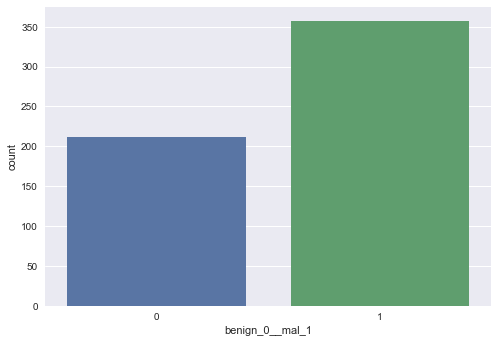

In [9]:
sns.countplot(x='benign_0__mal_1', data=df)
plt.show()

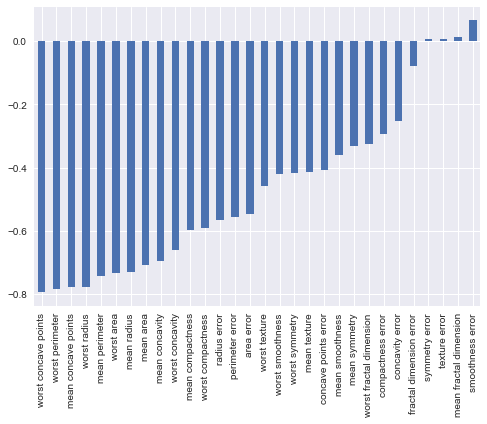

In [14]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
plt.show()

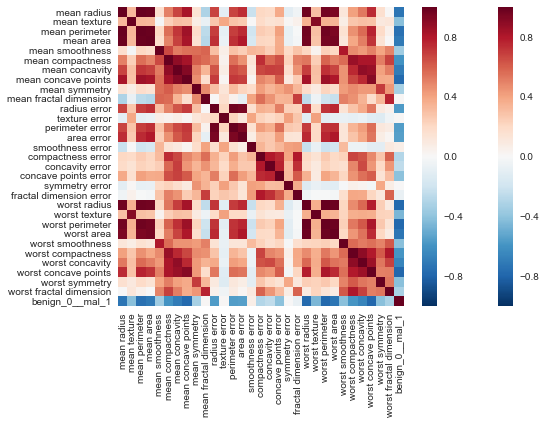

In [16]:
sns.heatmap(df.corr())
plt.show()

In [17]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.27, random_state = 101)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_test = scaler.transform(X_test)

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras.layers import Dense, Dropout

In [29]:
X_train.shape

(415, 30)

In [33]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))

model.add(Dense(15, activation = 'relu'))
# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [35]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data = (X_test,y_test))

Epoch 1/600
13/13 [==============================] - 0s 26ms/step - loss: 0.6852 - val_loss: 0.6692
Epoch 2/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6550 - val_loss: 0.6404
Epoch 3/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6246 - val_loss: 0.6082
Epoch 4/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5909 - val_loss: 0.5697
Epoch 5/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5513 - val_loss: 0.5296
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5085 - val_loss: 0.4852
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.4632 - val_loss: 0.4370
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 0.4154 - val_loss: 0.3897
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3712 - val_loss: 0.3489
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3324 - val_loss: 0.3128
Epoch 11

Epoch 83/600
13/13 [==============================] - 0s 23ms/step - loss: 0.0561 - val_loss: 0.1062
Epoch 84/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0560 - val_loss: 0.0979
Epoch 85/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0590 - val_loss: 0.1168
Epoch 86/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0576 - val_loss: 0.0964
Epoch 87/600
13/13 [==============================] - 0s 10ms/step - loss: 0.0565 - val_loss: 0.1266
Epoch 88/600
13/13 [==============================] - 0s 12ms/step - loss: 0.0591 - val_loss: 0.0977
Epoch 89/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0532 - val_loss: 0.1120
Epoch 90/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0538 - val_loss: 0.1110
Epoch 91/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0520 - val_loss: 0.1071
Epoch 92/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0527 - val_loss: 0.1

13/13 [==============================] - 0s 5ms/step - loss: 0.0431 - val_loss: 0.1103
Epoch 165/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0411 - val_loss: 0.1541
Epoch 166/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0468 - val_loss: 0.1106
Epoch 167/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0437 - val_loss: 0.1303
Epoch 168/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0417 - val_loss: 0.1237
Epoch 169/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0422 - val_loss: 0.1304
Epoch 170/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0413 - val_loss: 0.1181
Epoch 171/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0413 - val_loss: 0.1299
Epoch 172/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0409 - val_loss: 0.1246
Epoch 173/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0399 - val_loss: 0.1255
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - val_loss: 0.1411
Epoch 246/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - val_loss: 0.1394
Epoch 247/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0355 - val_loss: 0.1476
Epoch 248/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0379 - val_loss: 0.1328
Epoch 249/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0342 - val_loss: 0.1398
Epoch 250/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0331 - val_loss: 0.1441
Epoch 251/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0336 - val_loss: 0.1355
Epoch 252/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0312 - val_loss: 0.1443
Epoch 253/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0318 - val_loss: 0.1360
Epoch 254/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0321 - val_loss: 0.1529
Epoc

13/13 [==============================] - 0s 8ms/step - loss: 0.0336 - val_loss: 0.1804
Epoch 327/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0267 - val_loss: 0.1479
Epoch 328/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0291 - val_loss: 0.1545
Epoch 329/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0294 - val_loss: 0.1398
Epoch 330/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0274 - val_loss: 0.1571
Epoch 331/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0224 - val_loss: 0.1463
Epoch 332/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0225 - val_loss: 0.1545
Epoch 333/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0254 - val_loss: 0.1448
Epoch 334/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0230 - val_loss: 0.1398
Epoch 335/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0247 - val_loss: 0.1790
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.0158 - val_loss: 0.1851
Epoch 408/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0186 - val_loss: 0.1473
Epoch 409/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.1879
Epoch 410/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0155 - val_loss: 0.1600
Epoch 411/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0158 - val_loss: 0.1706
Epoch 412/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0166 - val_loss: 0.1595
Epoch 413/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0158 - val_loss: 0.1810
Epoch 414/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0161 - val_loss: 0.1619
Epoch 415/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0147 - val_loss: 0.1876
Epoch 416/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0160 - val_loss: 0.1585
Epoc

13/13 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.1914
Epoch 489/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0105 - val_loss: 0.1809
Epoch 490/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 0.2041
Epoch 491/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0101 - val_loss: 0.1745
Epoch 492/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0101 - val_loss: 0.1886
Epoch 493/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0105 - val_loss: 0.2047
Epoch 494/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0096 - val_loss: 0.1806
Epoch 495/600
13/13 [==============================] - 0s 11ms/step - loss: 0.0103 - val_loss: 0.2010
Epoch 496/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0108 - val_loss: 0.1844
Epoch 497/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0098 - val_loss: 0.2079
Epo

13/13 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.2019
Epoch 570/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.2121
Epoch 571/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0063 - val_loss: 0.1818
Epoch 572/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0060 - val_loss: 0.2233
Epoch 573/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0062 - val_loss: 0.1987
Epoch 574/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0067 - val_loss: 0.2056
Epoch 575/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.2412
Epoch 576/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 0.1698
Epoch 577/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0085 - val_loss: 0.2425
Epoch 578/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.1760
Epoc

In [36]:
losses = pd.DataFrame(model.history.history)

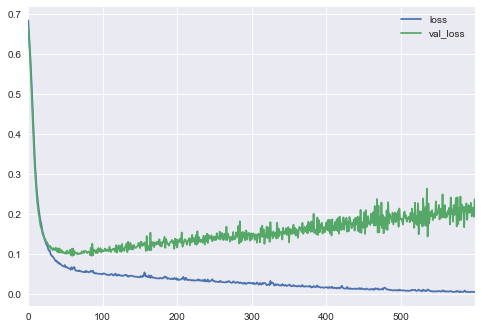

In [40]:
losses.plot()
plt.show()

In [41]:
# this is a perfect example of overfitting
# Too many epochs
# We will use Early Stopping to correct this

In [42]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))

model.add(Dense(15, activation = 'relu'))
# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be 'loss', and mode would be 'min'. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Example:
 |  
 |  >>> callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
 |  >>> # This callback will stop the training when there is no improvement in
 |  >>> # the validation loss for three consecutive epochs.
 |  >>> model 

In [45]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
# patience : we will wait for 25 epochs

In [46]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data = (X_test,y_test), callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 13ms/step - loss: 0.6649 - val_loss: 0.6384
Epoch 2/600
13/13 [==============================] - 0s 7ms/step - loss: 0.6210 - val_loss: 0.6018
Epoch 3/600
13/13 [==============================] - 0s 8ms/step - loss: 0.5822 - val_loss: 0.5639
Epoch 4/600
13/13 [==============================] - 0s 7ms/step - loss: 0.5408 - val_loss: 0.5242
Epoch 5/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4991 - val_loss: 0.4820
Epoch 6/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4547 - val_loss: 0.4388
Epoch 7/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4124 - val_loss: 0.3971
Epoch 8/600
13/13 [==============================] - 0s 7ms/step - loss: 0.3711 - val_loss: 0.3555
Epoch 9/600
13/13 [==============================] - 0s 6ms/step - loss: 0.3340 - val_loss: 0.3238
Epoch 10/600
13/13 [==============================] - 0s 6ms/step - loss: 0.3007 - val_loss: 0.2903
Epoch 11

Epoch 83/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0512 - val_loss: 0.1086
Epoch 84/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0490 - val_loss: 0.1153
Epoch 85/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0490 - val_loss: 0.1203
Epoch 86/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0486 - val_loss: 0.1110
Epoch 87/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0499 - val_loss: 0.1165
Epoch 88/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0491 - val_loss: 0.1160
Epoch 00088: early stopping


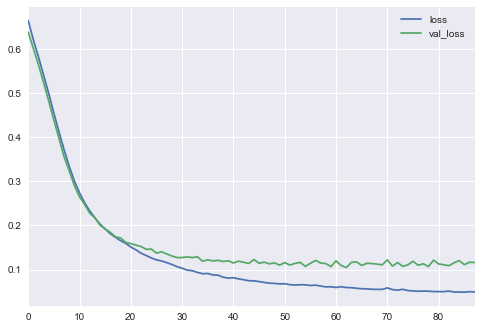

In [49]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()

In [50]:
# green line flattenning out is OK behaviur, we wanto avoid its increase

In [51]:
# ADD DROP-OUT LAYER

In [52]:
 # this will essentially turn off a percentage of Neurons automatically

In [53]:
from tensorflow.keras.layers import Dropout

In [54]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5)) # half of the neurn sin this layer of 30 will be turned off randomly

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [55]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data = (X_test,y_test), callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 14ms/step - loss: 0.7185 - val_loss: 0.6827
Epoch 2/600
13/13 [==============================] - 0s 7ms/step - loss: 0.6881 - val_loss: 0.6765
Epoch 3/600
13/13 [==============================] - 0s 9ms/step - loss: 0.6821 - val_loss: 0.6712
Epoch 4/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6597 - val_loss: 0.6576
Epoch 5/600
13/13 [==============================] - 0s 7ms/step - loss: 0.6602 - val_loss: 0.6360
Epoch 6/600
13/13 [==============================] - 0s 7ms/step - loss: 0.6291 - val_loss: 0.6116
Epoch 7/600
13/13 [==============================] - 0s 7ms/step - loss: 0.5980 - val_loss: 0.5847
Epoch 8/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5826 - val_loss: 0.5522
Epoch 9/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5600 - val_loss: 0.5217
Epoch 10/600
13/13 [==============================] - 0s 7ms/step - loss: 0.5526 - val_loss: 0.4939
Epoch 11

Epoch 83/600
13/13 [==============================] - 0s 8ms/step - loss: 0.1092 - val_loss: 0.1113
Epoch 84/600
13/13 [==============================] - 0s 8ms/step - loss: 0.1194 - val_loss: 0.1118
Epoch 85/600
13/13 [==============================] - 0s 7ms/step - loss: 0.1214 - val_loss: 0.1108
Epoch 86/600
13/13 [==============================] - 0s 7ms/step - loss: 0.1115 - val_loss: 0.1202
Epoch 87/600
13/13 [==============================] - 0s 8ms/step - loss: 0.1008 - val_loss: 0.1260
Epoch 88/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0954 - val_loss: 0.1089
Epoch 89/600
13/13 [==============================] - 0s 7ms/step - loss: 0.1132 - val_loss: 0.1120
Epoch 90/600
13/13 [==============================] - 0s 10ms/step - loss: 0.1086 - val_loss: 0.1339
Epoch 91/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0995 - val_loss: 0.1423
Epoch 92/600
13/13 [==============================] - 0s 8ms/step - loss: 0.1028 - val_loss: 0.1089

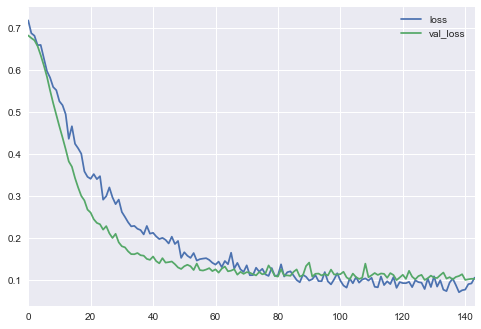

In [56]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()

In [57]:
# much imporoveed

In [59]:
predictions = model.predict_classes(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        58
          1       0.99      0.99      0.99        96

avg / total       0.99      0.99      0.99       154



In [62]:
# very good performance

In [63]:
print(confusion_matrix(y_test, predictions))

[[57  1]
 [ 1 95]]
